<a href="https://colab.research.google.com/github/aliwagdy2580/Deep-Learning/blob/main/Gender_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
import random


In [2]:
class_names=['man','woman']
img_size=96
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    
    
    class_name_labels={class_names:i for i,class_names in enumerate (class_names) }
    
    for folder in os.listdir(directory):
        
        label=class_name_labels[folder]
        
        path=os.path.join(directory,folder)
        for image in tqdm(os.listdir(path)): #Extracting the file name of the image from Class Label folder
            
            path_image=os.path.join(path,image)
            
            image = cv2.imread(path_image) #Reading the image (OpenCV)
            
            #Resize the image, Some images are different sizes. (Resizing is very Important)
            image = cv2.resize(image,(img_size,img_size)) 
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            # Append the image and its corresponding label to the output
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=44) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
  labels = {0:'man',1:'woman'}
  return labels[class_code]


In [3]:
images,labels = get_images('drive/MyDrive/gender_dataset_face') #Extract the training images from the folders.

train_images = np.array(images)/255 #converting the list of images to numpy array.
train_labels = np.array(labels)

100%|██████████| 1173/1173 [00:04<00:00, 258.56it/s]


In [4]:
X_train=train_images[:1900,]
X_test=train_images[1900:,]
y_train=train_labels[:1900,]
y_test=train_labels[1900:,]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1900, 96, 96, 3)
(407, 96, 96, 3)
(1900,)
(407,)


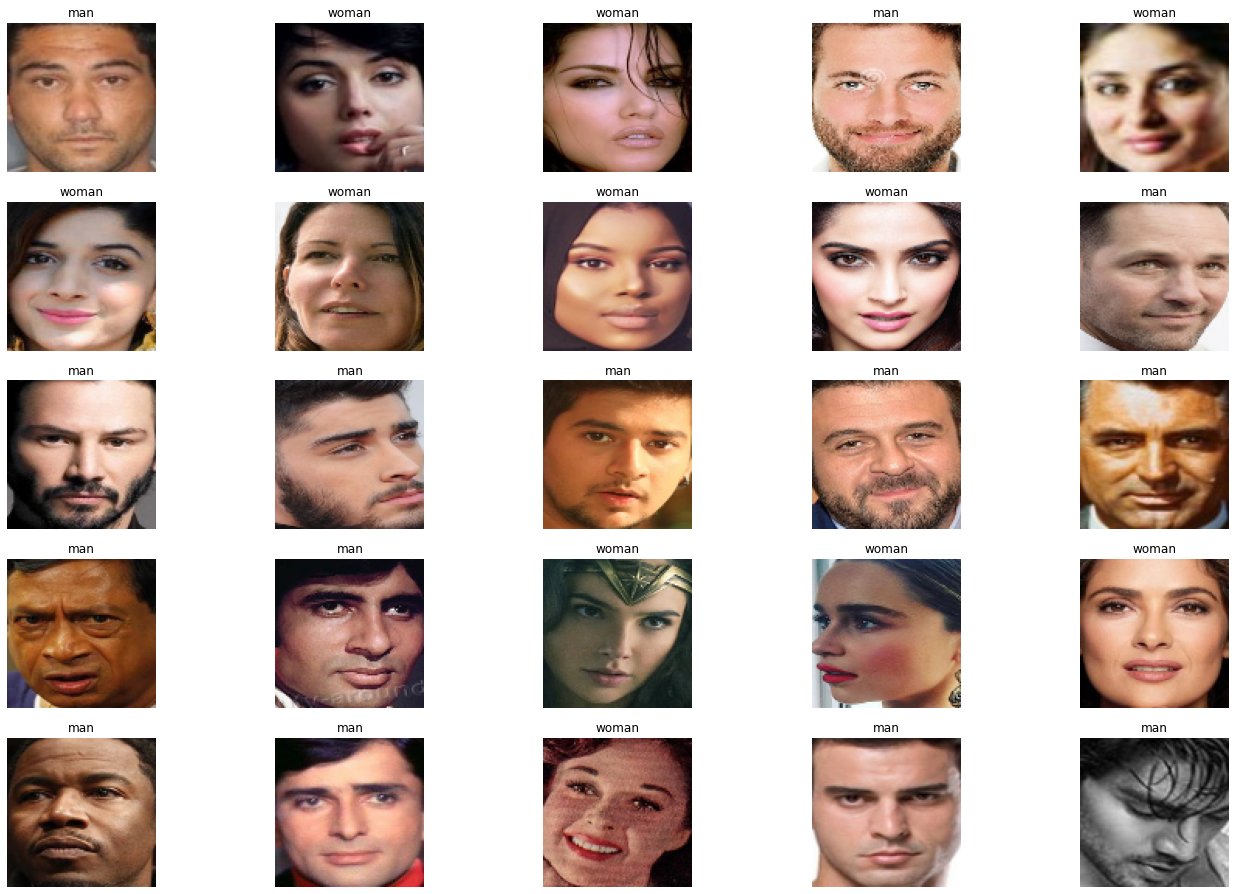

In [5]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5):
    for j in range(0,5):
        rnd_number = np.random.randint(0,len(train_images))
        ax[i,j].imshow(train_images[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=100,test_size=0.2)

In [7]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [8]:
data_gen=ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [9]:
batch_size=64
train_batchs=data_gen.flow(X_train,y_train,batch_size=batch_size)
test_batchs=data_gen.flow(X_test,y_test)
val_batchs=data_gen.flow(X_val,y_val)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(img_size, img_size, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0

In [11]:

#opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])


history=model.fit_generator(train_batchs,epochs=120,validation_data=val_batchs, steps_per_epoch=len(X_train) //64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/120
23/23 [==============================] - 8s 205ms/step - loss: 0.9540 - accuracy: 0.6486 - val_loss: 0.7281 - val_accuracy: 0.4974
Epoch 2/120
23/23 [==============================] - 4s 183ms/step - loss: 0.5380 - accuracy: 0.8067 - val_loss: 0.9161 - val_accuracy: 0.4974
Epoch 3/120
23/23 [==============================] - 4s 183ms/step - loss: 0.4117 - accuracy: 0.8370 - val_loss: 2.2282 - val_accuracy: 0.4974
Epoch 4/120
23/23 [==============================] - 4s 181ms/step - loss: 0.3684 - accuracy: 0.8382 - val_loss: 1.8610 - val_accuracy: 0.4974
Epoch 5/120
23/23 [==============================] - 4s 180ms/step - loss: 0.3116 - accuracy: 0.8737 - val_loss: 0.9440 - val_accuracy: 0.4974
Epoch 6/120
23/23 [==============================] - 4s 180ms/step - loss: 0.3183 - accuracy: 0.8770 - val_loss: 1.5359 - val_accuracy: 0.4974
Epoch 7/120
23/23 [==============================] - 4s 178ms/step - loss: 0.3327 - accuracy: 0.8823 - val_loss: 0.8622 - val_accuracy: 0.5132

In [12]:
model.fit(X_test,y_test)

13/13 [==============================] - 1s 28ms/step - loss: 0.1280 - accuracy: 0.9631


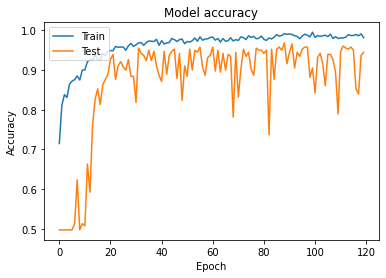

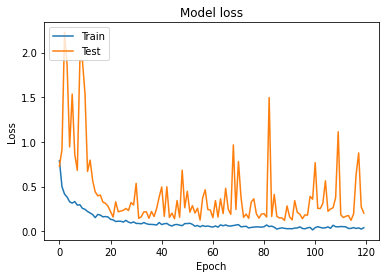

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
y_pred=model.predict(X_test)


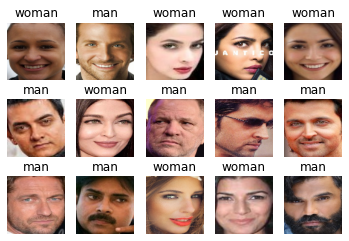

In [15]:
for n , i in enumerate(list(np.random.randint(0,len(X_test),15))) : 
    plt.subplot(3,5,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_classlabel(np.argmax(y_pred[i])))